# Final Project Submission

Please fill out:
* Student name: Myrna Grace
* Student pace: Part Time
* Scheduled project review date/time: 10/xx/21
* Instructor name: Claude Fried
* Blog post URL:


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Overview of Data

In [2]:
house_data = pd.read_csv('data/kc_house_data.csv')
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
house_data.info()
house_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(21597, 21)

In [4]:
# columns to take a closer look at
# look at the unique values for price
house_data.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [5]:
# sanity check missing values
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning & Exploring

Plan 
- Set the columns(waterfront, view, yr_renovated) with missing values to '0'
- Replace column dtypes for necessary columns


In [7]:
# check the value counts for each column.
for value in house_data.columns:
    print(value) # column name
    print(house_data[value].value_counts(ascending=False)) # distribution of frequently occuring values
    print('                               ')

id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
                               
date
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/30/2014      1
7/27/2014      1
8/3/2014       1
1/10/2015      1
1/31/2015      1
Name: date, Length: 372, dtype: int64
                               
price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
                               
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
                               
bathrooms
2.50    5377
1.00    38

In [8]:
# Fill missing values and fix the dtypes
# drop ID
# dates are absolutely hectic lets convert by months & seasons sold instead
# drop sqft_living15 & sqft_lot15
# need to drop the bedroom outlier

# change missing values to the median 0
house_data['waterfront'].fillna(0, inplace=True)
# convert from float to int
house_data['waterfront'] = house_data['waterfront'].astype('int64')

# change missing values to the median 0
house_data['view'].fillna(0, inplace=True)
# convert from float to int
house_data['view'] = house_data['view'].astype('int64')

# change missing values to the median 0
house_data['yr_renovated'].fillna(0, inplace=True)
# convert from float to int
house_data['yr_renovated'] = house_data['yr_renovated'].astype('int64')

# replace '?' values to the median and then converting from float to int
house_data['sqft_basement'] = house_data['sqft_basement'].replace(to_replace='?',value=0)
house_data['sqft_basement'] = pd.to_numeric(house_data['sqft_basement'])
house_data['sqft_basement'] = house_data['sqft_basement'].astype('int64')

# convert to seasons_sold and months_sold 
house_data['date'] = pd.to_datetime(house_data['date'])

# double check data summary 
house_data.info()
house_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# id has multiple counts that means there are duplicate housing info on here
# is it safe to drop the duplicated data? check the %
house_data.duplicated('id').value_counts()

False    21420
True       177
dtype: int64

In [10]:
# checking the percentage of duplicated data for 'id'
# its best to get rid of this column 
house_data.duplicated('id').mean()

0.008195582719822198

In [11]:
# everything looks the same except the date and price
# the same houses were sold twice
# lets keep the latest house sold
# visually compare?
house_data[house_data.duplicated(subset=['id'], keep='last')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
345,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
371,2231500030,2014-10-01,315000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20164,7853400250,2014-06-04,610000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20596,2724049222,2014-08-02,163800.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20653,8564860270,2014-07-08,449990.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


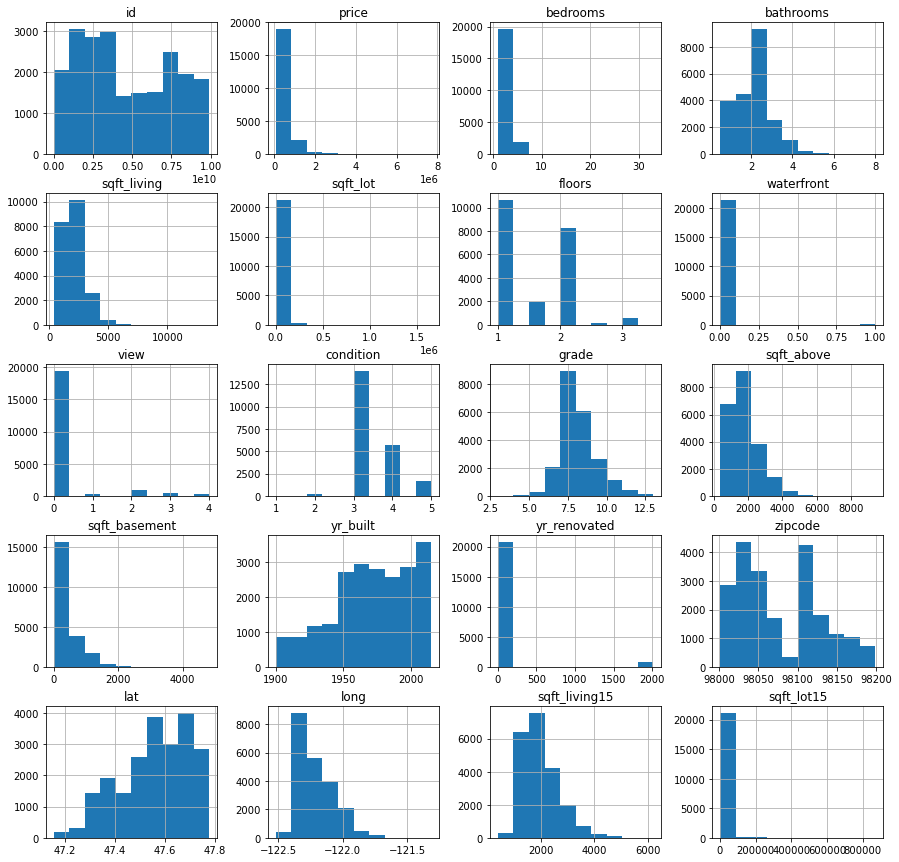

In [12]:
# checking the raw distribution for each feature
house_data.hist(figsize=(15,15));

The distribution for each feature is either left or right skewed. This will not pass the normality assumption test. We will work on this when preparing the data.

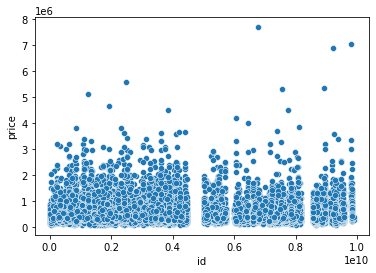

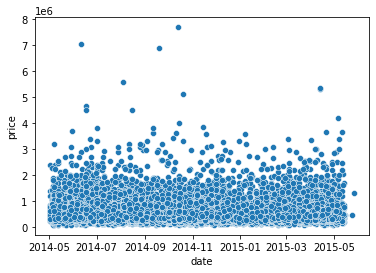

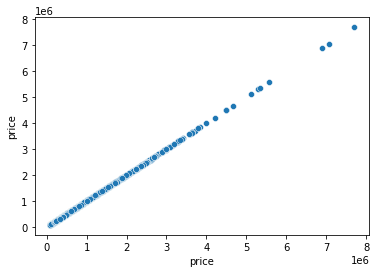

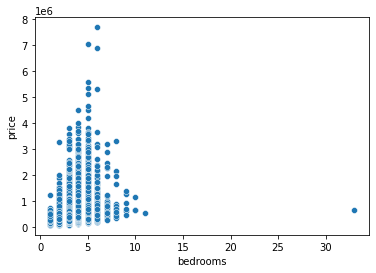

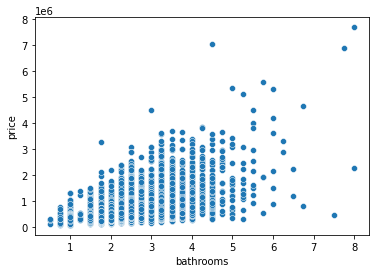

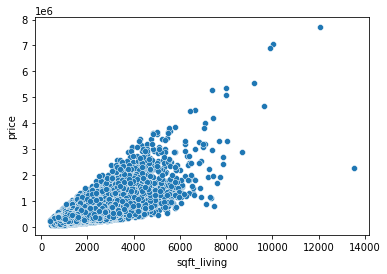

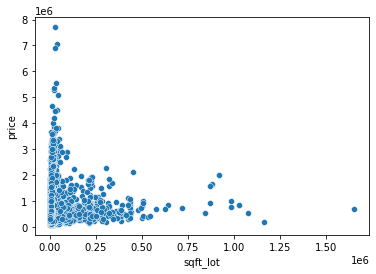

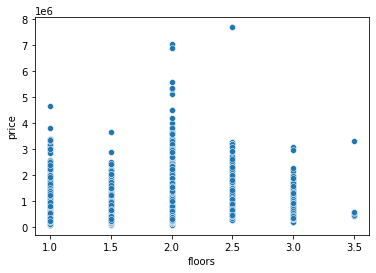

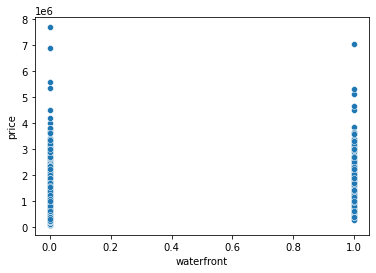

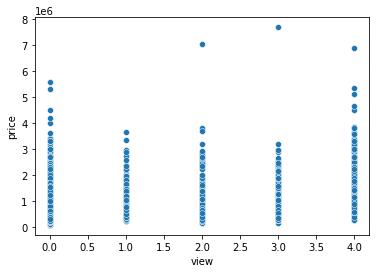

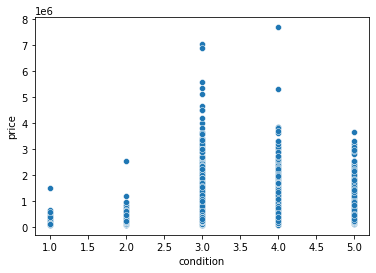

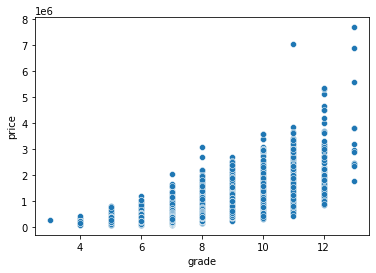

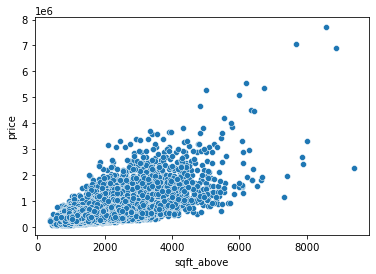

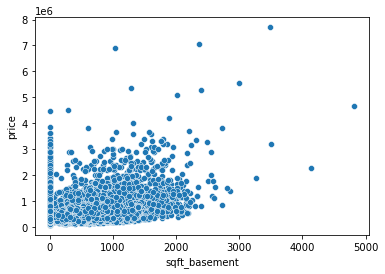

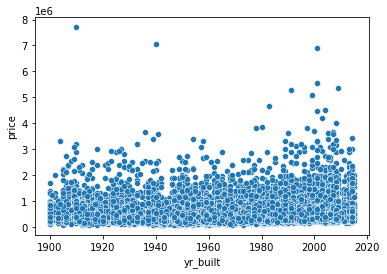

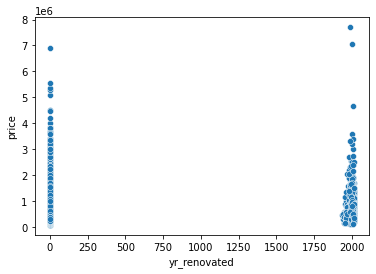

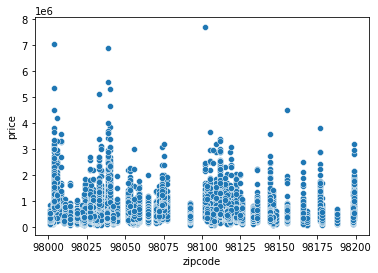

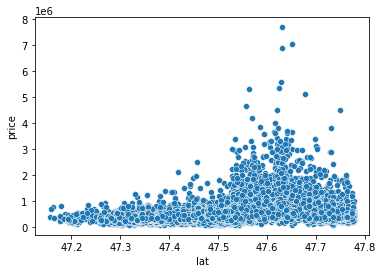

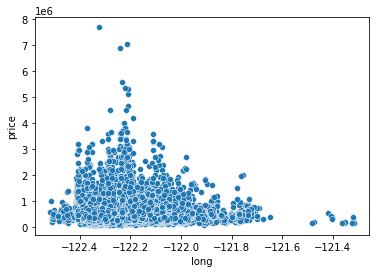

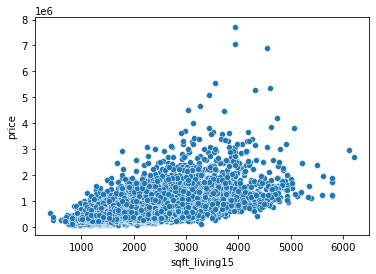

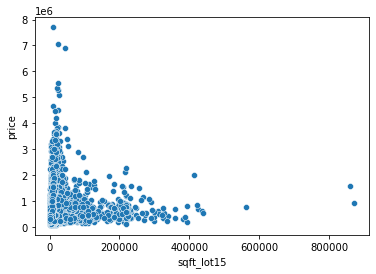

In [13]:
# taking a closer look at our features to closer identify which columns are categorical or numerical
# look out for possible outliers to remove
for x in house_data.columns:
    sns.scatterplot(x=x, y='price', data=house_data)
    plt.show()

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

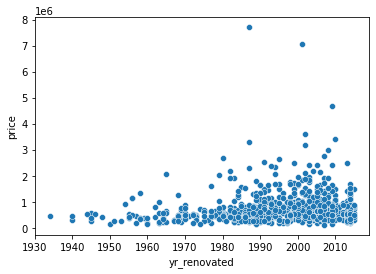

In [14]:
# taking a closer look of the yr_renovated to price 
yr = house_data[house_data['yr_renovated'] != 0]
sns.scatterplot(x='yr_renovated', y='price', data=yr)

Looking at the scatterplots between the features will help us determine the numerical and categorical variables in regards to price. The scatter plots that show vertical line structrue will be our catergorical variables while the graphs with a cloud structure will be our numerical variables.

In [15]:
# num_var = ['sqft_living', 'sqft_lot', ]

# sns.lmplot(x = 'bedrooms', y='price', data=house_data)

In [16]:
# compare months to price

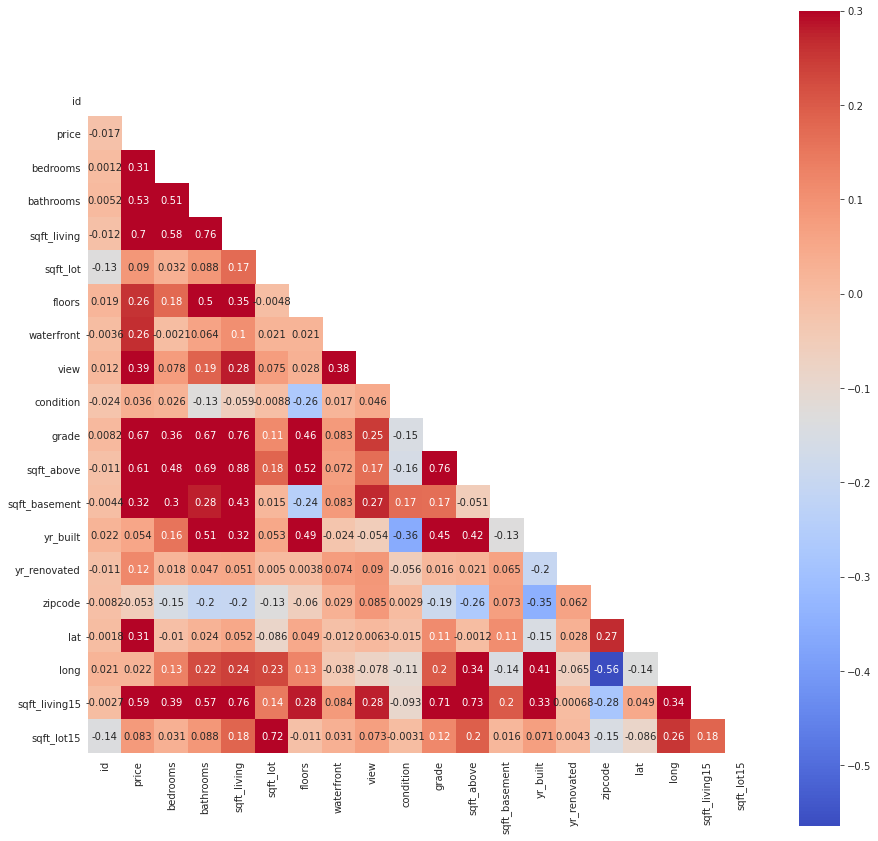

In [17]:
# visualize the correlation between features
# helps understand the multicollinearity 
corr = house_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='coolwarm', annot=True)

- Dark red represents strong positive linear relationships
- Dark blue presents strong negative linear relationships
- Help explain Multicollinearity
- r > .65 produces multicollinearity in a model
- Multicollinearity is when there is high correlation between three or more variables

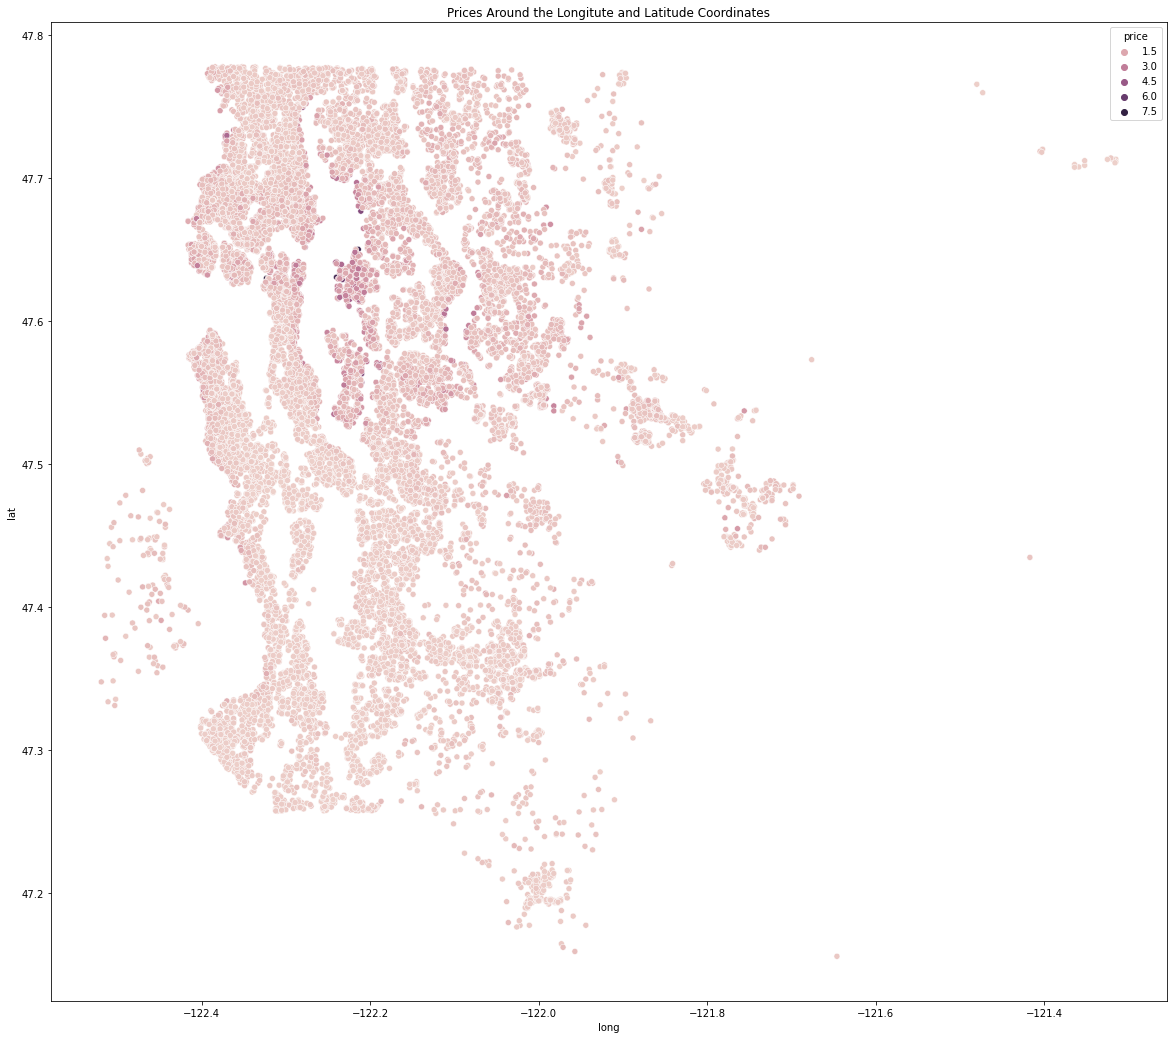

In [18]:
# plot the long and lat coordinates by price
# ask claude how 
plt.figure(figsize=(20,18))
sns.scatterplot(x = 'long', y = 'lat', data=house_data, hue = 'price')
plt.title("Prices Around the Longitute and Latitude Coordinates")
plt.xlabel("long")
plt.ylabel("lat")
plt.show()


The location with the highest price range is around bodies of water. Lets double check.

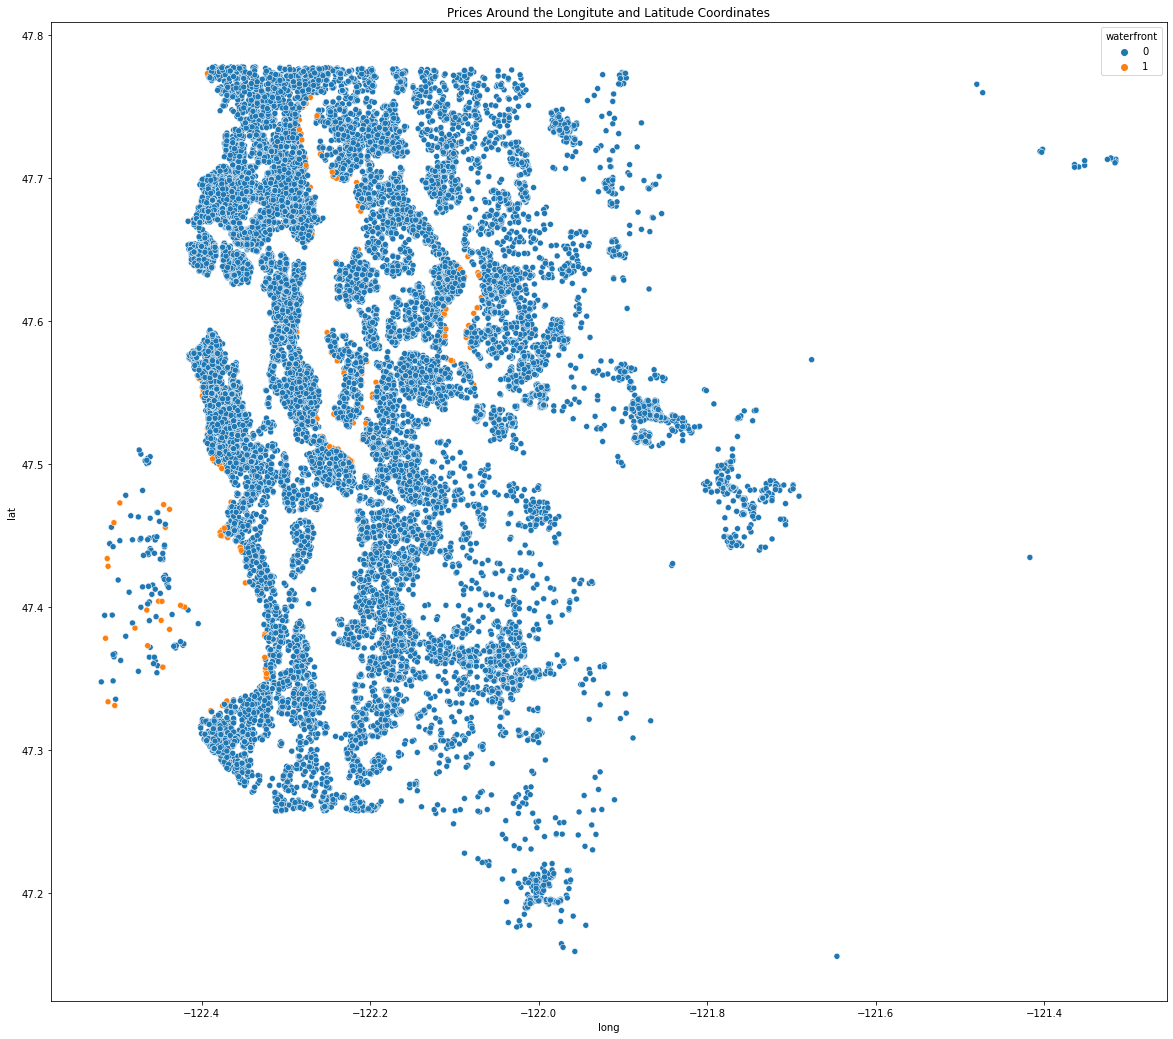

In [19]:
plt.figure(figsize=(20,18))
sns.scatterplot(x = 'long', y = 'lat', data=house_data, hue = 'waterfront')
plt.title("Prices Around the Longitute and Latitude Coordinates")
plt.xlabel("long")
plt.ylabel("lat")
plt.show()


In [20]:
# house_data['day','month','year'] = 

In [21]:
# used for method 2 modeling ols
target_var = 'price'
pred_features = [x_col for x_col in house_data.columns if x_col != target_var]
target_var in pred_features
pred_features

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

# Baseline Model

Lets build a linear regression model with all the variables to see how it affects the price individually. Some variables to look our for is our R^2, p-values, and the coefficients. 

Keep in mind: 
- R^2 explains how 'accurate' our regression model is and it is a good predictor for the dependent variable. % of variance we can explain by the model
- p-values explains how statstically significant the variables are (smaller the p-value the more statistically significant they are)
- coefficient - explains whether the price goes up or down

In [22]:
outcome = 'price'
predictors = house_data.drop(columns = ['price','date', 'id'], axis=1) 
# dropping date and id since they are not useful for our findings
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [23]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'

In [24]:
model_1 = ols(formula=formula, data=house_data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:23:15   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.656e+06   2.93e+06      2.271      0.023    9.12e+05    1.24e+07
bedrooms      -3.589e+04   1900.636    -18.882      0.000   -3.96e+04   -3.22e+04
bathrooms      4.162e+04   3262.735     12.755      0.000    3.52e+04     4.8e+04
sqft_living     102.8320     18.076      5.689      0.000      67.401     138.263
sqft_lot          0.1281      0.048      2.673      0.008       0.034       0.222
floors         7000.6499   3600.684      1.944      0.052     -56.956    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.329e+04   2122.073     25.111      0.000    4.91e+04    5.74e+04
condition      2.685e+04   2346.458     11.443      0.000    2.23e+04    3.15e+04
grade          9.691e+04   2160.604     44.853      0.000    9.27e+04    1.01e+05
sqft_above       78.0057     18.067      4.318      0.000      42.593     113.419
sqft_basement    47.6352     17.907      2.660      0.008      12.537      82.734
yr_built      -2637.5367     71.932    -36.667      0.000   -2778.528   -2496.545
yr_renovated     23.5856      3.977      5.930      0.000      15.790      31.381
zipcode        -584.4582     32.991    -17.716      0.000    -649.122    -519.794
lat            6.007e+05   1.07e+04     55.939      0.000     5.8e+05    6.22e+05
long          -2.177e+05   1.32e+04    -16.546      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.5139      3.451      6.235      0.000      14.751      28.277
sqft_lot15       -0.3877      0.073     -5.285      0.000      -0.531      -0.244
==============================================================================
Omnibus:                    18343.380   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1833646.592
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      47.575   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

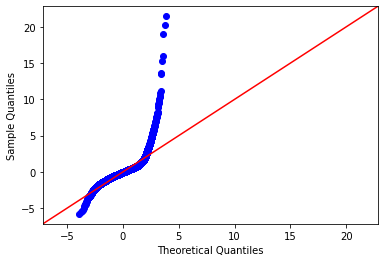

In [25]:
# use a qqplot to check for normality
# ha clearly we can't use this model

fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

QQ plot used for residuals and to check for normality. As we can see the residuals deviate from normality (does not follow the regression line) which causes some concern for our baseline model. 

In [26]:
# explain
# could use log to normalize the features

# Categorical Variables

Ordinal variables to look out for 
- waterfront
- view
- condition
- grade
- bedroom
- floors
- zip codes

### Grades vs. Price

In [27]:
house_data1 = house_data.copy()
house_data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [28]:
grade_dummies = pd.get_dummies(house_data1.grade, prefix = 'grade', drop_first = True)
grade_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   grade_4   21597 non-null  uint8
 1   grade_5   21597 non-null  uint8
 2   grade_6   21597 non-null  uint8
 3   grade_7   21597 non-null  uint8
 4   grade_8   21597 non-null  uint8
 5   grade_9   21597 non-null  uint8
 6   grade_10  21597 non-null  uint8
 7   grade_11  21597 non-null  uint8
 8   grade_12  21597 non-null  uint8
 9   grade_13  21597 non-null  uint8
dtypes: uint8(10)
memory usage: 211.0 KB


In [29]:
grade_dummies

,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,1,0,0,0,0,0
21593,0,0,0,0,1,0,0,0,0,0
21594,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,1,0,0,0,0,0


In [30]:
house_data1['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [31]:
house_data1[house_data1['grade'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3220,2420069251,2015-02-25,262000.0,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233


In [32]:
house_data1['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [33]:
house_data1 = pd.concat([house_data1, grade_dummies], axis=1)
house_data1.info()
house_data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,1,0,0,0,0,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
# house_data1[house_data1.duplicated(subset=['id'], keep=False)]

In [35]:
# house_data1 = house_data.drop(columns=['date', 'id'], axis = 1)
# house_data1

In [50]:
outcome = 'price'
predictors = house_data1.drop(columns = ['price', 'date', 'id'], axis=1) 
# dropping date and id since they are not useful for our findings
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [51]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+grade_13'

In [52]:
model_2 = ols(formula=formula, data=house_data1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2160.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:23:47   Log-Likelihood:            -2.9325e+05
No. Observations:               21597   AIC:                         5.866e+05
Df Residuals:                   21569   BIC:                         5.868e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.857e+06   2.73e+06      2.874      0.004     2.5e+06    1.32e+07
bedrooms       -2.04e+04   1842.597    -11.069      0.000    -2.4e+04   -1.68e+04
bathrooms      4.374e+04   3110.324     14.062      0.000    3.76e+04    4.98e+04
sqft_living      96.0334     17.156      5.598      0.000      62.406     129.660
sqft_lot          0.1258      0.046      2.765      0.006       0.037       0.215
floors         2.588e+04   3467.607      7.463      0.000    1.91e+04    3.27e+04
waterfront         6e+05   1.72e+04     34.794      0.000    5.66e+05    6.34e+05
view           4.946e+04   2016.508     24.526      0.000    4.55e+04    5.34e+04
condition        3.3e+04   2232.709     14.780      0.000    2.86e+04    3.74e+04
grade          1.471e+05   3.32e+04      4.429      0.000     8.2e+04    2.12e+05
sqft_above       37.1885     17.170      2.166      0.030       3.534      70.843
sqft_basement    36.6129     16.997      2.154      0.031       3.298      69.927
yr_built      -2177.9898     69.295    -31.431      0.000   -2313.812   -2042.167
yr_renovated     34.5992      3.785      9.141      0.000      27.181      42.018
zipcode        -599.9719     31.376    -19.122      0.000    -661.471    -538.473
lat            6.172e+05   1.02e+04     60.475      0.000    5.97e+05    6.37e+05
long          -2.091e+05   1.25e+04    -16.728      0.000   -2.34e+05   -1.85e+05
sqft_living15    27.5737      3.304      8.345      0.000      21.097      34.050
sqft_lot15       -0.3858      0.070     -5.541      0.000      -0.522      -0.249
grade_4       -3.171e+05   1.71e+05     -1.853      0.064   -6.52e+05    1.84e+04
grade_5       -4.807e+05   1.47e+05     -3.264      0.001   -7.69e+05   -1.92e+05
grade_6       -6.034e+05   1.31e+05     -4.592      0.000   -8.61e+05   -3.46e+05
grade_7       -7.122e+05   1.23e+05     -5.768      0.000   -9.54e+05    -4.7e+05
grade_8       -7.994e+05   1.24e+05     -6.441      0.000   -1.04e+06   -5.56e+05
grade_9        -8.26e+05   1.33e+05     -6.204      0.000   -1.09e+06   -5.65e+05
grade_10      -8.111e+05   1.49e+05     -5.436      0.000    -1.1e+06   -5.19e+05
grade_11      -7.136e+05    1.7e+05     -4.190      0.000   -1.05e+06    -3.8e+05
grade_12      -4.007e+05   1.95e+05     -2.051      0.040   -7.84e+05   -1.78e+04
grade_13        6.46e+05   2.24e+05      2.884      0.004    2.07e+05    1.08e+06
==============================================================================
Omnibus:                    14368.297   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           744435.266
Skew:                           2.576   Prob(JB):                         0.00
Kurtosis:                      31.297   Cond. No.                     2.28e+15
================================================================

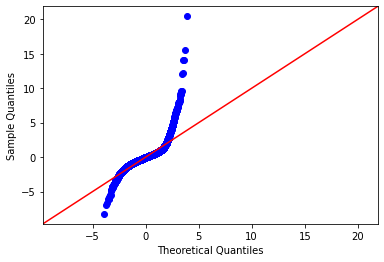

In [53]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [40]:
# check for MSE and how wrong is our model
# train-test split

### Grades without OHE

In [41]:
house_data2 = house_data.copy()

In [42]:
outcome = 'price'
predictors = house_data1.drop(columns = ['price','date', 'id', 'grade'], axis=1) 
# dropping date and id since they are not useful for our findings
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [43]:
model_2 = ols(formula=formula, data=house_data1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     2160.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:23:18   Log-Likelihood:            -2.9325e+05
No. Observations:               21597   AIC:                         5.866e+05
Df Residuals:                   21569   BIC:                         5.868e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.298e+06   2.79e+06      2.973      0.003    2.83e+06    1.38e+07
bedrooms       -2.04e+04   1842.597    -11.069      0.000    -2.4e+04   -1.68e+04
bathrooms      4.374e+04   3110.324     14.062      0.000    3.76e+04    4.98e+04
sqft_living      96.0334     17.156      5.598      0.000      62.406     129.660
sqft_lot          0.1258      0.046      2.765      0.006       0.037       0.215
floors         2.588e+04   3467.607      7.463      0.000    1.91e+04    3.27e+04
waterfront         6e+05   1.72e+04     34.794      0.000    5.66e+05    6.34e+05
view           4.946e+04   2016.508     24.526      0.000    4.55e+04    5.34e+04
condition        3.3e+04   2232.709     14.780      0.000    2.86e+04    3.74e+04
sqft_above       37.1885     17.170      2.166      0.030       3.534      70.843
sqft_basement    36.6129     16.997      2.154      0.031       3.298      69.927
yr_built      -2177.9898     69.295    -31.431      0.000   -2313.812   -2042.167
yr_renovated     34.5992      3.785      9.141      0.000      27.181      42.018
zipcode        -599.9719     31.376    -19.122      0.000    -661.471    -538.473
lat            6.172e+05   1.02e+04     60.475      0.000    5.97e+05    6.37e+05
long          -2.091e+05   1.25e+04    -16.728      0.000   -2.34e+05   -1.85e+05
sqft_living15    27.5737      3.304      8.345      0.000      21.097      34.050
sqft_lot15       -0.3858      0.070     -5.541      0.000      -0.522      -0.249
grade_4         -1.7e+05   1.95e+05     -0.873      0.382   -5.51e+05    2.11e+05
grade_5       -1.865e+05   1.91e+05     -0.974      0.330   -5.62e+05    1.89e+05
grade_6       -1.622e+05   1.91e+05     -0.848      0.396   -5.37e+05    2.13e+05
grade_7       -1.238e+05   1.91e+05     -0.647      0.517   -4.98e+05    2.51e+05
grade_8       -6.393e+04   1.91e+05     -0.334      0.738   -4.39e+05    3.11e+05
grade_9        5.661e+04   1.91e+05      0.296      0.767   -3.18e+05    4.32e+05
grade_10       2.186e+05   1.91e+05      1.142      0.253   -1.57e+05    5.94e+05
grade_11       4.632e+05   1.92e+05      2.417      0.016    8.75e+04    8.39e+05
grade_12       9.232e+05   1.93e+05      4.792      0.000    5.46e+05     1.3e+06
grade_13       2.117e+06   1.99e+05     10.629      0.000    1.73e+06    2.51e+06
==============================================================================
Omnibus:                    14368.297   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           744435.266
Skew:                           2.576   Prob(JB):                         0.00
Kurtosis:                      31.297   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

### Bedrooms & Bathrooms vs. Price Model

### Dates vs. Price Model

### Binning the Categorical Variables Altogether

## Outliers

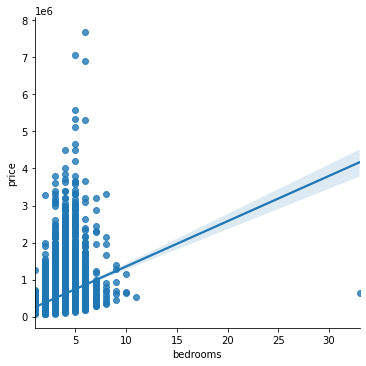

In [45]:
sns.lmplot(x='bedrooms', y='price', data=house_data)
plt.show()

In [46]:
house_data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [47]:
# drop the bedrooms that have the least amount of information 

In [48]:
corr = house_data[pred_features].corr()

In [49]:
# check outliers and remove them
# look at dates maybe add a months colmn
# decide which features to take a closer look at

## Conclusion

## Future Work